# Problem 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [2]:
# Declare constants

Rf = 0.02
rho = 0.5
gamma = 1      #not given, but set to 1
mu    = np.array([0.05,0.15]).reshape((2,1))
sigma = np.array([0.15,0.25]).reshape((2,1))
b     = np.array([0.03,0.03]).reshape((2,1))

Sigma = np.zeros((2,2))
Sigma[0,0] = sigma[0]**2
Sigma[0,1] = rho*sigma[0]*sigma[1]
Sigma[1,0] = rho*sigma[0]*sigma[1]
Sigma[1,1] = sigma[1]**2


### a)

In [3]:
# To Buy

n       = 1000
X0       = 1 # set a value for easiness of plotting
X1_n  = np.linspace(0.001,3,n)
UB1   = np.zeros((n,1)) #asset 1
UB2   = np.zeros((n,1)) #asset 2


UB1 = Rf+X1_n*(mu[0]-Rf)-0.5*gamma*sigma[0]**2*X1_n**2-(X1_n-X0)*b[0]
    
X1L = (mu[0]-Rf-b[0])/(gamma*sigma[0]**2)
UL = Rf+X1L*(mu[0]-Rf)-0.5*gamma*sigma[0]**2*X1L**2-(X1L-X0)*b[0]


UB2 = Rf+X1_n*(mu[1]-Rf)-0.5*gamma*sigma[1]**2*X1_n**2-(X1_n-X0)*b[1]
    
X2L = (mu[1]-Rf-b[1])/(gamma*sigma[1]**2)
UL2 = Rf+X2L*(mu[1]-Rf)-0.5*gamma*sigma[1]**2*X2L**2-(X2L-X0)*b[1]




In [10]:
# To sell

n       = 1000
X0       = 1 # set a value for easiness of plotting
X1_n  = np.linspace(0.001,3,n)
US1   = np.zeros((n,1)) #asset 1
US2   = np.zeros((n,1)) #asset 2


US1 = Rf+X1_n*(mu[0]-Rf)-0.5*gamma*sigma[0]**2*X1_n**2+(X1_n-X0)*b[0]
    
X1H = (mu[0]-Rf+b[0])/(gamma*sigma[0]**2)
UH = Rf+X1H*(mu[0]-Rf)-0.5*gamma*sigma[0]**2*X1H**2+(X1H-X0)*b[0]


US2 = Rf+X1_n*(mu[1]-Rf)-0.5*gamma*sigma[1]**2*X1_n**2+(X1_n-X0)*b[1]
    
X2H = (mu[1]-Rf+b[1])/(gamma*sigma[1]**2)
UH2 = Rf+X2H*(mu[1]-Rf)-0.5*gamma*sigma[1]**2*X2H**2+(X2H-X0)*b[1]


/Users/felicity/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


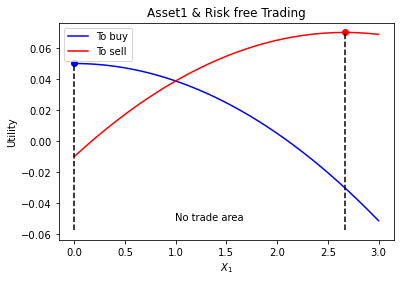

/Users/felicity/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


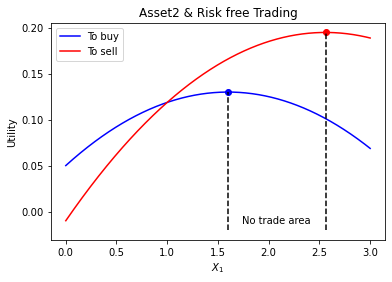

In [93]:
#plot
plt.figure()    
plt.plot(X1_n,UB1,'b-',label='To buy')
plt.plot(X1L,UL,'bo')
plt.plot(X1_n,US1,'r-',label='To sell')
plt.plot(X1H,UH,'ro')
axes = plt.gca()
ymin, ymax = axes.get_ylim()
plt.plot([X1L,X1L],[ymin,UL],'k--')
plt.plot([X1H,X1H],[ymin,UH],'k--')
plt.xlabel('$X_1$')
plt.ylabel('Utility')
plt.legend(loc="upper left")
plt.title('Asset1 & Risk free Trading')
axes.annotate('No trade area', xy=((X1L+X1H)/2,ymin+0.005), xytext=((X1L+X1H)/2,ymin+0.005), ha="center", va="bottom")
plt.show()

plt.figure()    
plt.plot(X1_n,UB2,'b-',label='To buy')
plt.plot(X2L,UL2,'bo')
plt.plot(X1_n,US2,'r-',label='To sell')
plt.plot(X2H,UH2,'ro')
axes = plt.gca()
ymin, ymax = axes.get_ylim()
plt.plot([X2L,X2L],[ymin,UL2],'k--')
plt.plot([X2H,X2H],[ymin,UH2],'k--')
plt.xlabel('$X_1$')
plt.ylabel('Utility')
plt.legend(loc="upper left")
plt.title('Asset2 & Risk free Trading')
axes.annotate('No trade area', xy=((X2L+X2H)/2,ymin+0.005), xytext=((X2L+X2H)/2,ymin+0.005), ha="center", va="bottom")
plt.show()

### b)

In [58]:
# Trades on both assets

Np = 1000

# Buy Buy
vbb = np.array([1,1]).reshape(2,1)
XBB1 = (inv(Sigma)@(mu-Rf-b*vbb))/gamma

# Buy Sell
vbs = np.array([1,-1]).reshape(2,1)
XBS1 = (inv(Sigma)@(mu-Rf-b*vbs))/gamma

# Sell Buy
vsb = np.array([-1,1]).reshape(2,1)
XSB1 = (inv(Sigma)@(mu-Rf-b*vsb))/gamma

# Sell Sell
vss = np.array([-1,-1]).reshape(2,1)
XSS1 = (inv(Sigma)@(mu-Rf-b*vss))/gamma

#For easiness of viewing, we shift the plot by 0.5 to see the BS,SB, BB, SS 
BB1_x = np.linspace(XBS1[0]-0.5,XBB1[0],Np)
BB1_y = XBB1[1]*np.ones((Np,1))
BB2_x = XBB1[0]*np.ones((Np,1))
BB2_y = np.linspace(XSB1[1]- 0.5,XBB1[1],Np)


BS1_x = np.linspace(XBS1[0]-0.5,XBS1[0],Np)
BS1_y = XBS1[1]*np.ones((Np,1))
BS2_x = XBS1[0]*np.ones((Np,1))
BS2_y = np.linspace(XBS1[1],XBS1[1]+ 0.5 ,Np)


SB1_x = np.linspace(XSB1[0],XSB1[0]+0.5,Np)
SB1_y = XSB1[1]*np.ones((Np,1))
SB2_x = XSB1[0]*np.ones((Np,1))
SB2_y = np.linspace(XSB1[1]- 0.5 ,XSB1[1],Np)


SS1_x = np.linspace(XSS1[0],XSB1[0]+0.5,Np)
SS1_y = XSS1[1]*np.ones((Np,1))
SS2_x = XSS1[0]*np.ones((Np,1))
SS2_y = np.linspace(XSS1[1],XBS1[1]+ 0.5 ,Np)


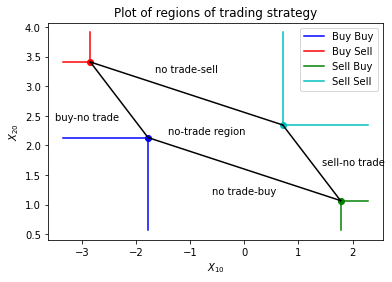

In [59]:

# Trade on one of the Asset
BN_x = np.zeros((Np,1))
SN_x = np.zeros((Np,1))
BN_y = np.linspace(XBS1[1],XBB1[1],Np).reshape((Np,1))
SN_y = np.linspace(XSS1[1],XSB1[1],Np).reshape((Np,1))

NS_y = np.zeros((Np,1))
NB_y = np.zeros((Np,1))
NS_x = np.linspace(XBS1[0],XSS1[0],Np).reshape((Np,1))
NB_x = np.linspace(XBB1[0],XSB1[0],Np).reshape((Np,1))



for j in range(Np):
    # Buy no trade
    BN_x[j] = (mu[0]-Rf-b[0]-Sigma[0][1]*BN_y[j])/(gamma*Sigma[0][0])
    
    # Sell no trade
    SN_x[j] = (mu[0]-Rf+b[0]-Sigma[0][1]*SN_y[j])/(gamma*Sigma[0][0])


    # no trade Buy
    NB_y[j] = (mu[1]-Rf-b[1]-Sigma[0][1]*NB_x[j])/(gamma*Sigma[1][1])
    
    # no trade Sell
    NS_y[j] = (mu[1]-Rf+b[1]-Sigma[0][1]*NS_x[j])/(gamma*Sigma[1][1])
    
    
plt.figure()  
#plot trade on both assets
plt.plot(XBB1[0],XBB1[1],'bo')
plt.plot(BB1_x,BB1_y,'b-')
plt.plot(BB2_x,BB2_y,'b-',label = 'Buy Buy')
plt.plot(XBS1[0],XBS1[1],'ro')
plt.plot(BS1_x,BS1_y,'r-')
plt.plot(BS2_x,BS2_y,'r-',label = 'Buy Sell')
plt.plot(XSB1[0],XSB1[1],'go')
plt.plot(SB1_x,SB1_y,'g-')
plt.plot(SB2_x,SB2_y,'g-',label = 'Sell Buy')
plt.plot(XSS1[0],XSS1[1],'co')
plt.plot(SS1_x,SS1_y,'c-')
plt.plot(SS2_x,SS2_y,'c-',label = 'Sell Sell')

#plot trade on one assests in black line
plt.plot(NS_x,NS_y,'k-')
plt.plot(NB_x,NB_y,'k-')
plt.plot(BN_x,BN_y,'k-')
plt.plot(SN_x,SN_y,'k-')
plt.xlabel('$X_{10}$')
plt.ylabel('$X_{20}$')
axes = plt.gca()

loc = ((XBS1[0]+XSS1[0])/2,(XBS1[1]+XSS1[1])/2+0.5)
axes.annotate('no trade-sell',xy=loc, xytext=loc, ha="center", va="top")
loc = ((XBB1[0]+XSB1[0])/2,(XBB1[1]+XSB1[1])/2-0.3)
axes.annotate('no trade-buy', xy=loc, xytext=loc, ha="center", va="top")
loc = ((XBB1[0]+XBS1[0])/2,(XBB1[1]+XBS1[1])/2 - 0.3)
axes.annotate('buy-no trade', xy=loc, xytext=loc, ha="right", va="center")
loc = ((XSB1[0]+XSS1[0])/2+0.2,(XSB1[1]+XSS1[1])/2)
axes.annotate('sell-no trade',xy=loc, xytext=loc, ha="left", va="center")
loc = ((XBB1[0]+XSS1[0]+XBS1[0]+XBS1[0])/4 + 1,(XBB1[1]+XSS1[1]+XSB1[1]+XBS1[1])/4)
axes.annotate('no-trade region', xy=loc, xytext=loc, ha="center", va="center")

plt.title('Plot of regions of trading strategy')
plt.legend(loc="upper right")
plt.show()


### c)

In [90]:


def visualize(newrho,newsigma2):

    Sigma = np.zeros((2,2))
    Sigma[0,0] = sigma[0]**2
    Sigma[0,1] = newrho*sigma[0]*newsigma2
    Sigma[1,0] = newrho*sigma[0]*newsigma2
    Sigma[1,1] = newsigma2**2

    # Buy Buy
    vbb = np.array([1,1]).reshape(2,1)
    XBB1 = (inv(Sigma)@(mu-Rf-b*vbb))/gamma

    # Buy Sell
    vbs = np.array([1,-1]).reshape(2,1)
    XBS1 = (inv(Sigma)@(mu-Rf-b*vbs))/gamma
    
    # Sell Buy
    vsb = np.array([-1,1]).reshape(2,1)
    XSB1 = (inv(Sigma)@(mu-Rf-b*vsb))/gamma
    
    # Sell Sell
    vss = np.array([-1,-1]).reshape(2,1)
    XSS1 = (inv(Sigma)@(mu-Rf-b*vss))/gamma
    
    #For easiness of viewing, we shift the plot by 0.5 to see the BS,SB, BB, SS 
    BB1_x = np.linspace(XBS1[0]-0.5,XBB1[0],Np)
    BB1_y = XBB1[1]*np.ones((Np,1))
    BB2_x = XBB1[0]*np.ones((Np,1))
    BB2_y = np.linspace(XSB1[1]- 0.5,XBB1[1],Np)
    
    BS1_x = np.linspace(XBS1[0]-0.5,XBS1[0],Np)
    BS1_y = XBS1[1]*np.ones((Np,1))
    BS2_x = XBS1[0]*np.ones((Np,1))
    BS2_y = np.linspace(XBS1[1],XBS1[1]+ 0.5 ,Np)

    
    SB1_x = np.linspace(XSB1[0],XSB1[0]+0.5,Np)
    SB1_y = XSB1[1]*np.ones((Np,1))
    SB2_x = XSB1[0]*np.ones((Np,1))
    SB2_y = np.linspace(XSB1[1]- 0.5 ,XSB1[1],Np)

    
    SS1_x = np.linspace(XSS1[0],XSB1[0]+0.5,Np)
    SS1_y = XSS1[1]*np.ones((Np,1))
    SS2_x = XSS1[0]*np.ones((Np,1))
    SS2_y = np.linspace(XSS1[1],XBS1[1]+ 0.5 ,Np)


    # Trade on one of the Asset
    BN_x = np.zeros((Np,1))
    SN_x = np.zeros((Np,1))
    BN_y = np.linspace(XBS1[1],XBB1[1],Np).reshape((Np,1))
    SN_y = np.linspace(XSS1[1],XSB1[1],Np).reshape((Np,1))

    NS_y = np.zeros((Np,1))
    NB_y = np.zeros((Np,1))
    NS_x = np.linspace(XBS1[0],XSS1[0],Np).reshape((Np,1))
    NB_x = np.linspace(XBB1[0],XSB1[0],Np).reshape((Np,1))



    for j in range(Np):
        # Buy no trade
        BN_x[j] = (mu[0]-Rf-b[0]-Sigma[0][1]*BN_y[j])/(gamma*Sigma[0][0])

        # Sell no trade
        SN_x[j] = (mu[0]-Rf+b[0]-Sigma[0][1]*SN_y[j])/(gamma*Sigma[0][0])


        # no trade Buy
        NB_y[j] = (mu[1]-Rf-b[1]-Sigma[0][1]*NB_x[j])/(gamma*Sigma[1][1])

        # no trade Sell
        NS_y[j] = (mu[1]-Rf+b[1]-Sigma[0][1]*NS_x[j])/(gamma*Sigma[1][1])


    plt.figure()  
    #plot trade on both assets
    plt.plot(XBB1[0],XBB1[1],'bo')
    plt.plot(BB1_x,BB1_y,'b-')
    plt.plot(BB2_x,BB2_y,'b-',label = 'Buy Buy')
    plt.plot(XBS1[0],XBS1[1],'ro')
    plt.plot(BS1_x,BS1_y,'r-')
    plt.plot(BS2_x,BS2_y,'r-',label = 'Buy Sell')
    plt.plot(XSB1[0],XSB1[1],'go')
    plt.plot(SB1_x,SB1_y,'g-')
    plt.plot(SB2_x,SB2_y,'g-',label = 'Sell Buy')
    plt.plot(XSS1[0],XSS1[1],'co')
    plt.plot(SS1_x,SS1_y,'c-')
    plt.plot(SS2_x,SS2_y,'c-',label = 'Sell Sell')

    #plot trade on one assests in black line
    plt.plot(NS_x,NS_y,'k-')
    plt.plot(NB_x,NB_y,'k-')
    plt.plot(BN_x,BN_y,'k-')
    plt.plot(SN_x,SN_y,'k-')
    plt.xlabel('$X_{10}$')
    plt.ylabel('$X_{20}$')
    axes = plt.gca()

    loc = ((XBS1[0]+XSS1[0])/2,(XBS1[1]+XSS1[1])/2+0.6)
    axes.annotate('no trade-sell',xy=loc, xytext=loc, ha="center", va="top")
    loc = ((XBB1[0]+XSB1[0])/2,(XBB1[1]+XSB1[1])/2-0.5)
    axes.annotate('no trade-buy', xy=loc, xytext=loc, ha="center", va="top")
    loc = ((XBB1[0]+XBS1[0])/2,(XBB1[1]+XBS1[1])/2)
    axes.annotate('buy-no trade', xy=loc, xytext=loc, ha="right", va="center")
    loc = ((XSB1[0]+XSS1[0])/2+0.2,(XSB1[1]+XSS1[1])/2)
    axes.annotate('sell-no trade',xy=loc, xytext=loc, ha="left", va="center")
    loc = ((XBB1[0]+XSS1[0]+XBS1[0]+XBS1[0])/4 + 1.2,(XBB1[1]+XSS1[1]+XSB1[1]+XBS1[1])/4)
    axes.annotate('no-trade region', xy=loc, xytext=loc, ha="center", va="center")
    
    plt.legend(loc="upper right")    
    plt.title('rho = '+str(newrho)+'sigma2 = '+str(newsigma2))
    plt.show()


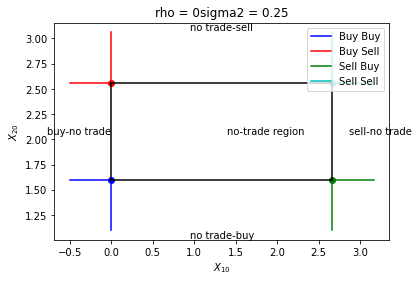

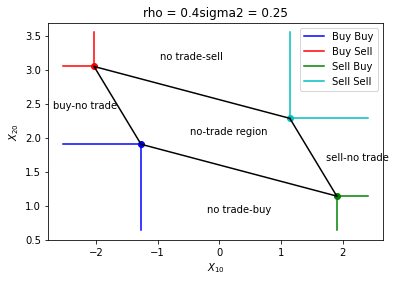

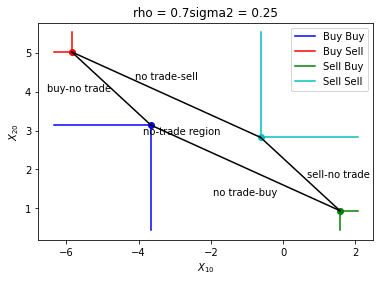

In [91]:
# vary rho, take 0, 0.4, 0.7
visualize(0,0.25)
visualize(0.4,0.25)
visualize(0.7,0.25)


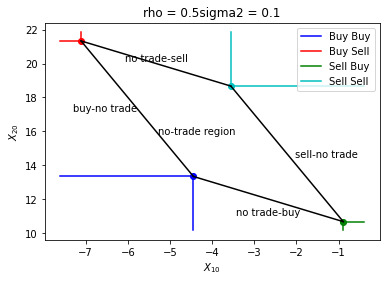

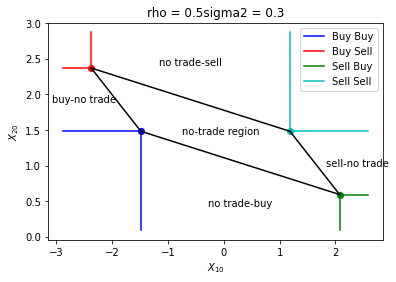

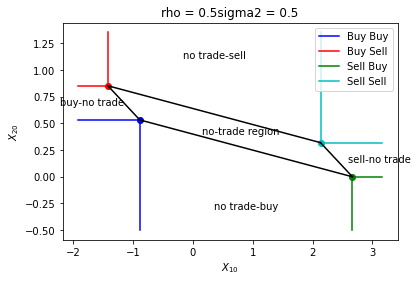

In [92]:
# vary sigma2, take 0.1, 0.3, 0.5
visualize(0.5,0.1)
visualize(0.5,0.3)
visualize(0.5,0.5)

# Problem 3

In [1]:
n_init = 1000000
lambd = 0.0001
sigma = 0.3

In [18]:
trade_times30 = 14 # every 30' from 0930 to 1600 both inclusive
trade_times10 = 37 # every 10' from 0930 to 1600 both inclusive

In [3]:
def slippage_cost(n_after, n_before, lambd):
    return lambd*(n_after - n_before)**2

In [4]:
gamma = .005
phi = lambd/(lambd+lambd+gamma*sigma**2)
n_fin = n_init * phi**14
n_fin
# gamma = 0.005 yields a 'sufficiently' close to zero terminal quantity of shares

4.161146508499255e-06

Since $aim_t = 0 \ \forall \ t$, $n_t = \phi^{t+1} n_{-1}$.

In [5]:
def phi_f(gamma):
    return lambd/(lambd+lambd+gamma*sigma**2)

In [8]:
ns = np.empty(trade_times30+1)
ns[0] = n_init
gammas = np.linspace(0.00,0.1,200)
costs = []

In [10]:
for g in gammas:
    cum_cost = 0
    for t in range(1,trade_times30):
        ns[t] = phi_f(g) * ns[t-1]
        cum_cost += slippage_cost(ns[t], ns[t-1], lambd)
    costs.append(cum_cost)

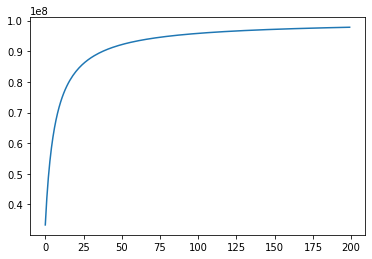

In [11]:
costs = np.array(costs)
plt.plot(costs)

This shows that the total trading costs over the whole trading period is a strictly increasing function of $\gamma$. However, we know that for $n_T$ to be sufficiently close to zero, $\gamma$ needs to be sufficiently large, so there is a trade-off between the extent to which the constraint $n_T=0$ is satisfied and the minimization of trading costs.

### Trade every 30 minutes

In [37]:
ns_opt = np.empty(trade_times30+1)
ns_opt[0] = n_init
costs_opt = []
for t in range(1,trade_times30):
    ns_opt[t] = phi_f(0) * ns_opt[t-1]
    costs_opt.append( slippage_cost(ns_opt[t], ns_opt[t-1], lambd) )

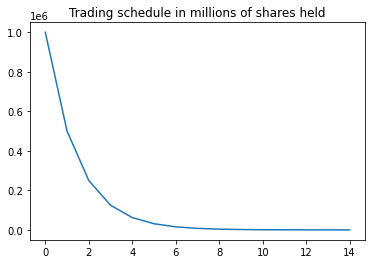

In [23]:
plt.plot(ns_opt)
plt.title('Trading schedule in millions of shares held');

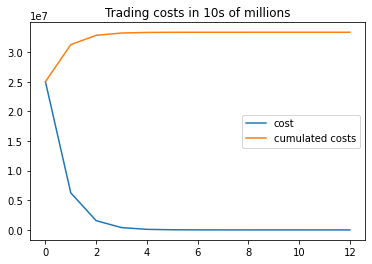

In [40]:
cum_costs30 = np.cumsum(costs_opt)
plt.plot(costs_opt, label='cost')
plt.plot(cum_costs30, label='cumulated costs')
plt.legend()
plt.title('Trading costs in 10s of millions');

### Trade every 10 minutes

In [29]:
ns_opt10 = np.empty(trade_times10+1)
ns_opt10[0] = n_init
costs_opt10 = []
for t in range(1,trade_times10):
    ns_opt10[t] = phi_f(0) * ns_opt10[t-1]
    costs_opt10.append( slippage_cost(ns_opt10[t], ns_opt10[t-1], lambd) )

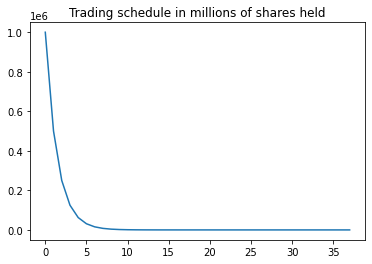

In [27]:
plt.plot(ns_opt10)
plt.title('Trading schedule in millions of shares held');

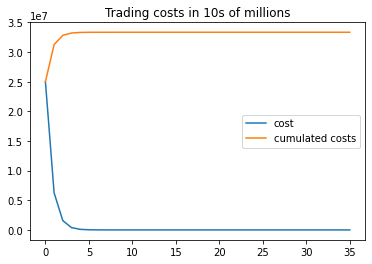

In [35]:
cum_costs10 = np.cumsum(costs_opt10)
plt.plot(costs_opt10, label='cost')
plt.plot(cum_costs10, label='cumulated costs')
plt.legend();
plt.title('Trading costs in 10s of millions');